# Logistic Regression Workshop

## Introduction
Welcome to this comprehensive workshop on Logistic Regression! In this session, we'll explore both the theoretical foundations and practical applications of logistic regression, one of the fundamental algorithms in machine learning for classification tasks.

### Workshop Outline
1. Understanding Logistic Regression
   - What is Logistic Regression?
   - Linear vs. Logistic Regression
   - The Sigmoid Function
3. Implementation
   - Data Preparation
   - Model Training
   - Making Predictions
4. Model Evaluation
   - Confusion Matrix
   - Accuracy, Precision, Recall
   - ROC Curve and AUC
5. Practical Example
   - Real-world Dataset
   - Complete Implementation

Let's begin by importing the necessary libraries!

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Set random seed for reproducibility
np.random.seed(42)

## 1. Understanding Logistic Regression

### What is Logistic Regression?
Logistic regression is a statistical method for predicting binary outcomes. Despite its name, it's used for classification rather than regression. Some common examples include:
- Email spam detection (spam/not spam)
- Disease diagnosis (present/absent)
- Customer churn prediction (will churn/won't churn)

### Linear vs. Logistic Regression
While linear regression predicts continuous values, logistic regression predicts the probability of an instance belonging to a particular class. The key difference lies in the output:
- Linear Regression: y = mx + b (can be any real number)
- Logistic Regression: P(y=1) = 1 / (1 + e^-(mx + b)) (bounded between 0 and 1)

Let's visualize this difference:

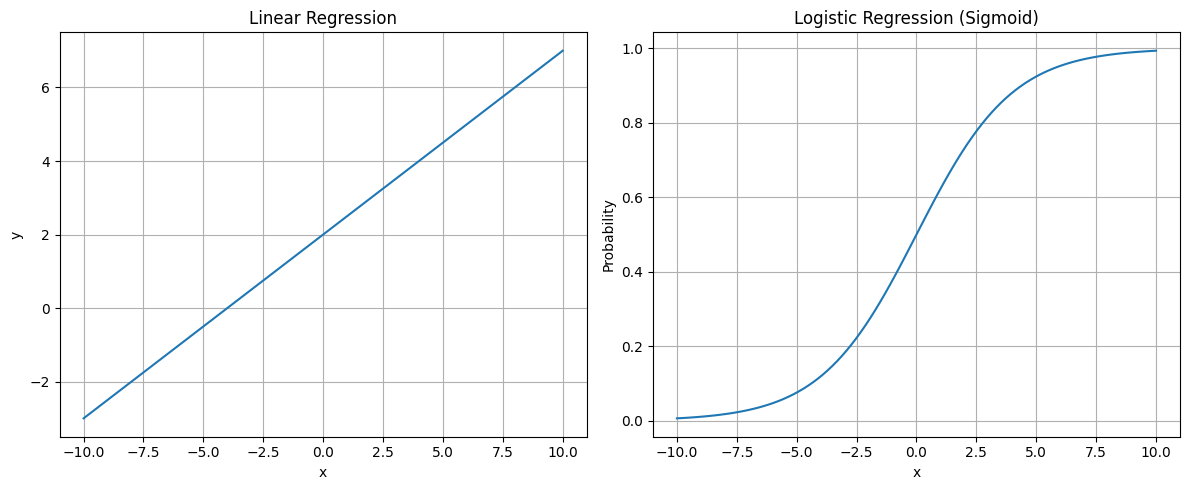

In [3]:
# Generate sample data
x = np.linspace(-10, 10, 100)
y_linear = 0.5 * x + 2
y_logistic = 1 / (1 + np.exp(-0.5 * x))

# Create the visualization
plt.figure(figsize=(12, 5))

# Plot linear regression
plt.subplot(1, 2, 1)
plt.plot(x, y_linear)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Plot logistic regression
plt.subplot(1, 2, 2)
plt.plot(x, y_logistic)
plt.title('Logistic Regression (Sigmoid)')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

### The Sigmoid Function
The sigmoid function (also called the logistic function) is the key component that transforms linear predictions into probabilities:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


Properties of the sigmoid function:
1. Output is always between 0 and 1
2. S-shaped curve
3. Differentiable (important for optimization)


## 3. Implementation

Let's implement logistic regression on a simple dataset. We'll create a synthetic dataset for binary classification:

In [4]:
# Generate synthetic data
np.random.seed(42)
X = np.random.normal(size=(100, 2))
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

## 4. Model Evaluation

Let's evaluate our model using various metrics:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



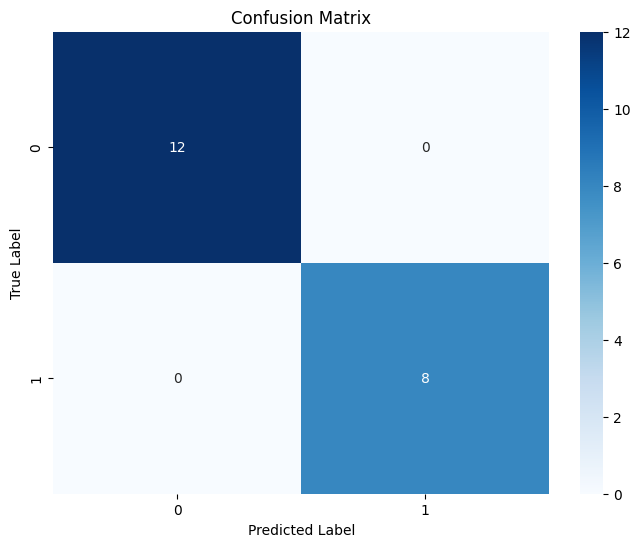

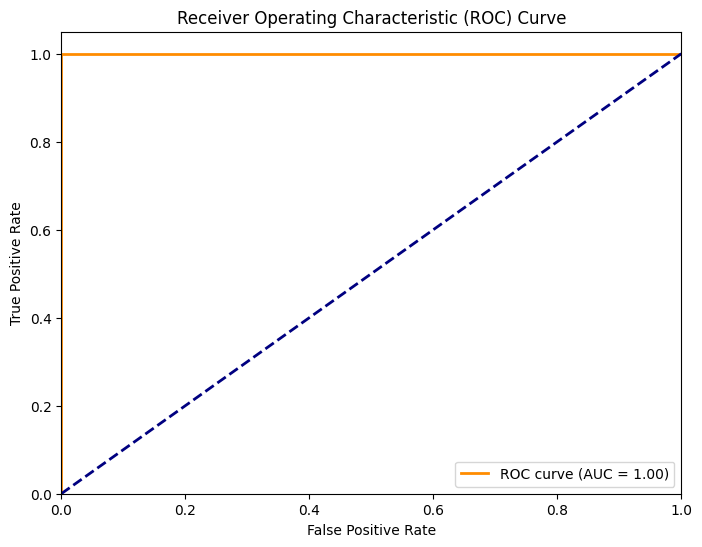

In [4]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 5. Practical Example

Now let's work with a real-world dataset. We'll use the famous Breast Cancer Wisconsin dataset:

Classification Report for Breast Cancer Prediction:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



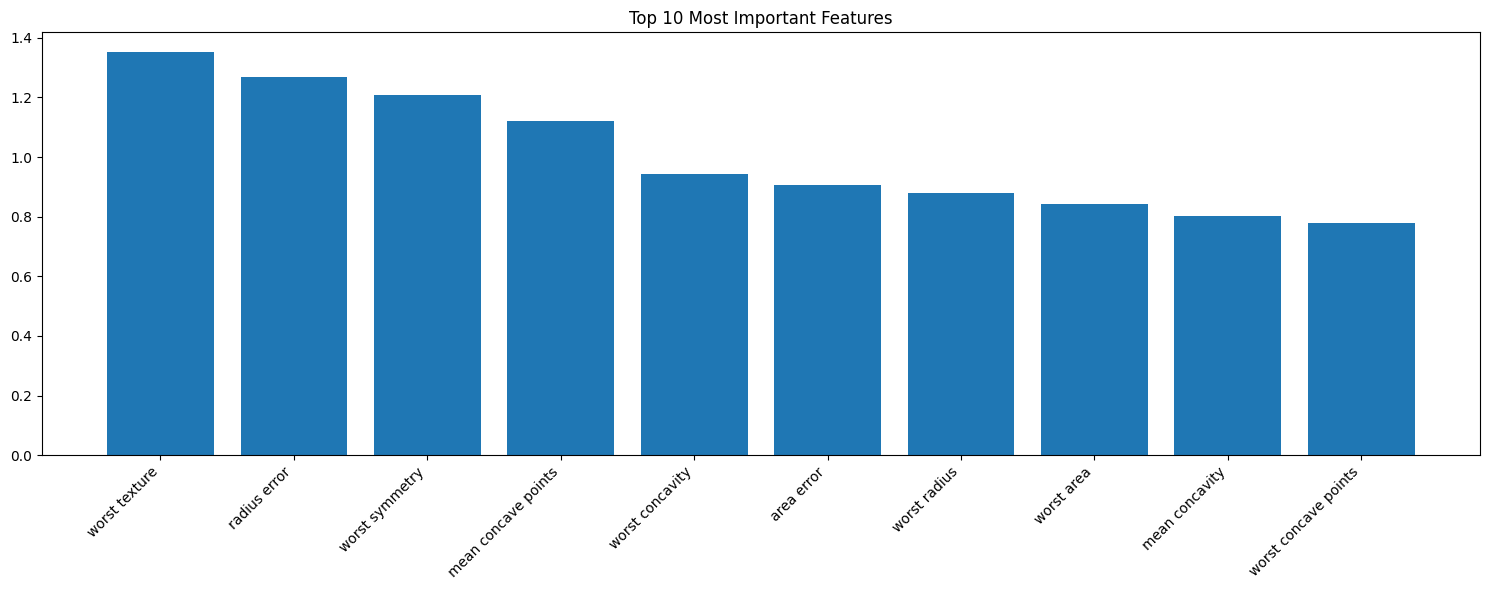

In [6]:
from sklearn.datasets import load_breast_cancer

# Load the data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print classification report
print('Classification Report for Breast Cancer Prediction:')
print(classification_report(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(15, 6))
importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': abs(model.coef_[0])
})
importance = importance.sort_values('Importance', ascending=False)

plt.bar(importance['Feature'][:10], importance['Importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

## Conclusion

In this workshop, we've covered:
1. The fundamental concepts of logistic regression
2. The mathematics behind the algorithm
3. Implementation using scikit-learn
4. Model evaluation techniques
5. A real-world application

### Key Takeaways
- Logistic regression is best suited for binary classification problems
- Feature scaling is important for better model performance
- Multiple metrics should be considered when evaluating the model
- The algorithm can provide insights into feature importance

### Next Steps
- Try implementing multiclass logistic regression
- Experiment with different regularization parameters
- Apply the model to your own classification problems